# Heart Disease Dataset <br>
Dataset link => https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?fbclid=IwAR3aFWsaop9q3Iij_Row_7BicLqCrVNt-_Kehmdt4mTnotfoucPtKrUhYgk

# Dataset Details
1)age <br>
2)sex <br>
3)chest pain type (4 values) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;1)typical angina <br>
    &nbsp;&nbsp;&nbsp;&nbsp;2)atypical angina <br>
    &nbsp;&nbsp;&nbsp;&nbsp;3)non-anginal pain <br>
    &nbsp;&nbsp;&nbsp;&nbsp;4)asymptomatic <br>
4)resting blood pressure <br>
5)serum cholestoral in mg/dl <br>
6)fasting blood sugar > 120 mg/dl (1=true;0=false) <br>
7)resting electrocardiographic results (values 0,1,2) (0=normal,1=abnormal,2=showing probable or definite left ventricular hypertrophy <br>
8)maximum heart rate achieved <br>
9)exercise induced angina(1=yes,0=No) <br>
10)oldpeak = ST depression induced by exercise relative to rest <br>
11)the slope of the peak exercise ST segment (1=upsloping,2=flat,3=downsloping) <br>
12)number of major vessels (0-3) colored by flourosopy <br>
13)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect <br>
14)target: 0=less chance of heart attack, 1=more chance of heart attack <br>
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Import CSV File

In [178]:
data=pd.read_csv('heart.csv')

# Display Data For Top 5 Rows

In [179]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Display Data For Last 5 Rows

In [180]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Data Shape

In [181]:
data.shape

(1025, 14)

# Data Info

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Check Data is isnull() or not?

In [183]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check Duplicates Values

In [184]:
data_duplicate=data.duplicated().any()
print(data_duplicate)

True


# Remove Duplicates Values

In [185]:
data=data.drop_duplicates()

# Data Shape

In [186]:
data.shape

(302, 14)

# Data Description

In [187]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Find Correlation

In [188]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Create Headmap

<AxesSubplot:>

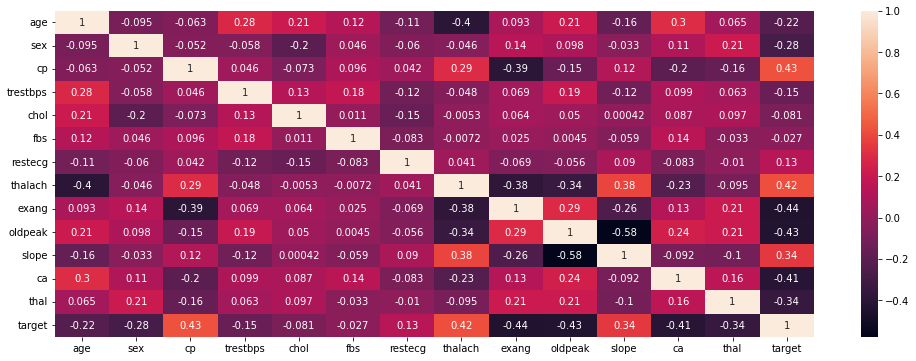

In [189]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [190]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

# Heart Disease Values

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



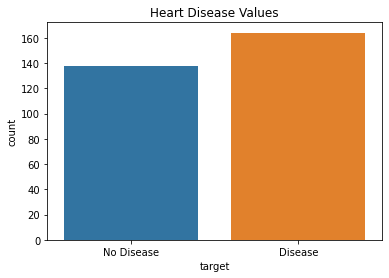

In [191]:
sns.countplot(data['target'])
plt.title("Heart Disease Values")
plt.xticks([0,1],['No Disease','Disease'])
plt.show()

# Gender Distribution According to Heart Disease

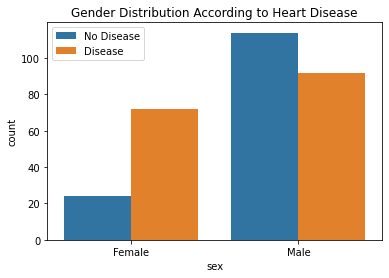

In [192]:
sns.countplot(x="sex",hue="target",data=data)
plt.title("Gender Distribution According to Heart Disease")
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

# Chest Pain Type

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



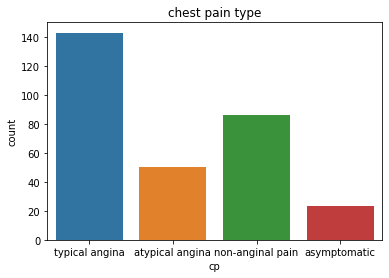

In [193]:
sns.countplot(data['cp'])
plt.title("chest pain type")
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

# Chest Pain Distribution According To Heart Disease 

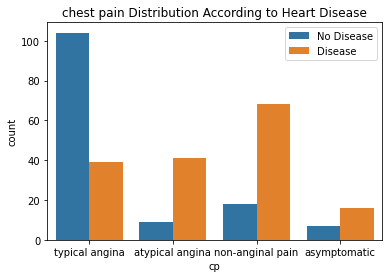

In [194]:
sns.countplot(x="cp",hue="target",data=data)
plt.title("chest pain Distribution According to Heart Disease")
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

# Fasting Blood Sugar Distribution According to Heart Disease

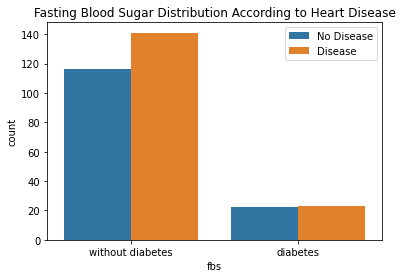

In [195]:
sns.countplot(x="fbs",hue="target",data=data)
plt.title("Fasting Blood Sugar Distribution According to Heart Disease")
plt.xticks([0,1],['without diabetes','diabetes'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

# Age Distribution According to Heart Disease

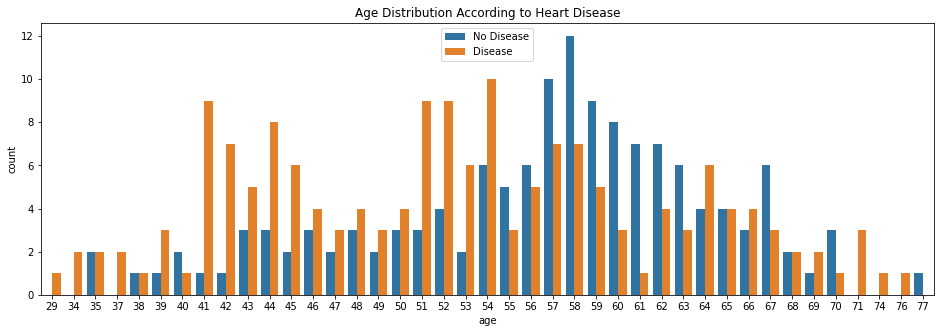

In [196]:
plt.figure(figsize = (16,5))
sns.countplot(x="age",hue="target",data=data)
plt.title("Age Distribution According to Heart Disease")
plt.legend(labels=['No Disease','Disease'])
plt.show()

# Fasting Blood Sugar Distribution According to Heart Disease

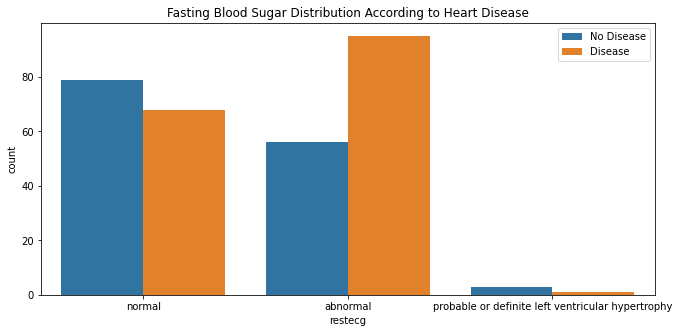

In [197]:

plt.figure(figsize = (11,5))
sns.countplot(x="restecg",hue="target",data=data)
plt.title("Fasting Blood Sugar Distribution According to Heart Disease")
plt.xticks([0,1,2],['normal','abnormal','probable or definite left ventricular hypertrophy'])
plt.legend(labels=['No Disease','Disease'])

plt.show()

# Resting blood Pressure Histogram

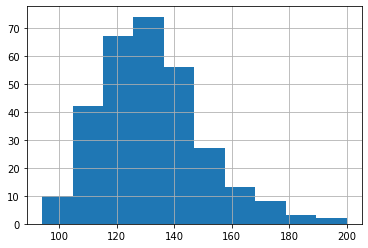

In [198]:
data['trestbps'].hist()
plt.show()

# Resting Blood Pressure With Gender Wise

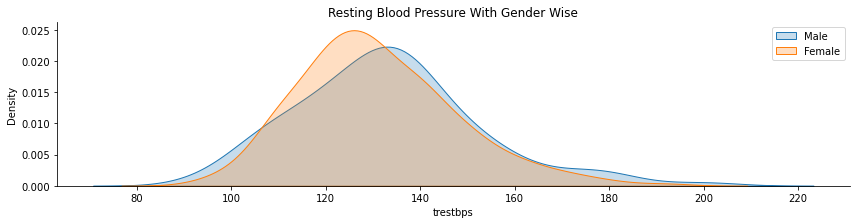

In [199]:
bloodpr=sns.FacetGrid(data,hue="sex",aspect=4)
bloodpr.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.title("Resting Blood Pressure With Gender Wise")
plt.show()

# Apply For Model

In [200]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [201]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [202]:
X=dataset.drop(columns='target',axis=1)
Y=dataset['target']

In [203]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [204]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [205]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)


In [206]:
print(X.shape,X_train.shape,X_test.shape)

(302, 30) (241, 30) (61, 30)


# LOGISTIC REGRESSION MODEL

In [207]:
model=LogisticRegression()
model.fit(X_train,Y_train)
#logistic

LogisticRegression()

# Confusion Matrix

<AxesSubplot:>

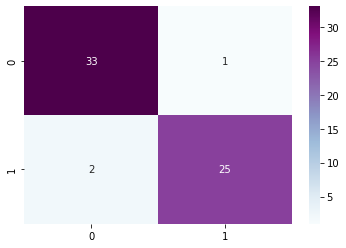

In [208]:
Pred1=model.predict(X_test)


cm=confusion_matrix(Y_test,Pred1)
sns.heatmap(cm, annot=True,cmap='BuPu')


# Model Accuracy

In [209]:
train_da_accuracy=accuracy_score(Y_test,Pred1)
print("Accuracy On Train Data : ",train_da_accuracy)

Accuracy On Train Data :  0.9508196721311475


# Classification Report

In [210]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Pred1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.96      0.93      0.94        27

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



# RANDOM FOREST MODEL

In [211]:
from sklearn.ensemble import RandomForestClassifier
#RandomForest
rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, Y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(Y_test, prediction3)

array([[31,  3],
       [ 3, 24]], dtype=int64)

# MODEL ACCURACY

In [212]:
rand=accuracy_score(Y_test, prediction3)
rand

0.9016393442622951

# CLASSIFICATION REPORT

In [213]:
print(classification_report(Y_test, prediction3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.89      0.89      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# KFold MODEL

In [214]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,Y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(Y_test,prediction4)
cm4

array([[29,  5],
       [ 3, 24]], dtype=int64)

# MODEL ACCURACY

In [215]:
kfold=accuracy_score(Y_test, prediction4)
kfold

0.8688524590163934

# GaussianNB MODEL

In [216]:
from sklearn.naive_bayes import GaussianNB
#NB
NB = GaussianNB()
model5 = NB.fit(X_train, Y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(Y_test, prediction5)
cm5

array([[32,  2],
       [ 5, 22]], dtype=int64)

# MODEL ACCURACY

In [217]:
gaus=accuracy_score(Y_test, prediction5)
gaus

0.8852459016393442

# GradientBoostingClassifier MODEL

In [218]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

# MODEL ACCURACY

In [219]:
y_pred_adb = gbc_clf.predict(X_test)
bost=accuracy_score(Y_test,y_pred_adb)
bost

0.8360655737704918

In [220]:
score=cross_val_score(gbc_clf,X_train,Y_train,cv=10)
score.mean()

0.7968333333333334

# MODELS ACCURACY LISTS

In [221]:
print ("LOGISTIC MODEL","{:.0%}".format(train_da_accuracy))
print("RANDOM FOREST MODEL","{:.0%}".format(rand))
print("KFold MODEL","{:.0%}".format(kfold))
print("GaussianNB MODEL","{:.0%}".format(gaus))
print("GradientBoostingClassifier MODEL","{:.0%}".format(bost))


LOGISTIC MODEL 95%
RANDOM FOREST MODEL 90%
KFold MODEL 87%
GaussianNB MODEL 89%
GradientBoostingClassifier MODEL 84%


# LOGISTIC MODEL IS BEST FITTED WITH 95% ACCURACY